In [2]:
#importar librerias
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
import streamlit as st
from func_lib import missing_val

Leyendo el archivo.
La documentacion esta en https://dev.socrata.com/foundry/healthdata.gov/g62h-syeh

<h2 id="Eleccion de columnas para trabajar">Eleccion de columnas para trabajar</h2>

Los datos fuente presentan algo de redundancia, inconsistencias y varios datos faltantes, especialmente en los reportes pediatricos.

Se realizara una exploracion por secciones Pediatricos, Adultos, ICU+Comun y con la libreria missingo para ver como estan distribuidos los datos nulos o nan y realizar acciones pertinentes.

En ningun caso se tiene en cuenta las columnas que contengan "coverage","previous", "denominator o "numerator"

<h3 id="Pediatricos">Pediatricos</h3>

In [26]:
pediatric=pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv',thousands=',', usecols= lambda x: 'coverage' not in  x and 'previous' not in  x and 'pedia' in x) 
pediatric.head()

,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,all_pediatric_inpatient_bed_occupied,all_pediatric_inpatient_beds,staffed_icu_pediatric_patients_confirmed_covid,staffed_pediatric_icu_bed_occupancy,total_staffed_pediatric_icu_beds
0,23.0,2.0,29.0,134.0,NaN,4.0,15.0
1,7.0,4.0,308.0,448.0,0.0,55.0,102.0
2,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,35.0,10.0,48.0,127.0,0.0,4.0,15.0


In [ ]:
pediatric=pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv',thousands=',', usecols= lambda x: 'coverage' not in  x and 'previous' not in  x and 'pedia' in x) 
pediatric.head()

,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,all_pediatric_inpatient_bed_occupied,all_pediatric_inpatient_beds,staffed_icu_pediatric_patients_confirmed_covid,staffed_pediatric_icu_bed_occupancy,total_staffed_pediatric_icu_beds
0,23.0,2.0,29.0,134.0,NaN,4.0,15.0
1,7.0,4.0,308.0,448.0,0.0,55.0,102.0
2,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,35.0,10.0,48.0,127.0,0.0,4.0,15.0


<AxesSubplot:>

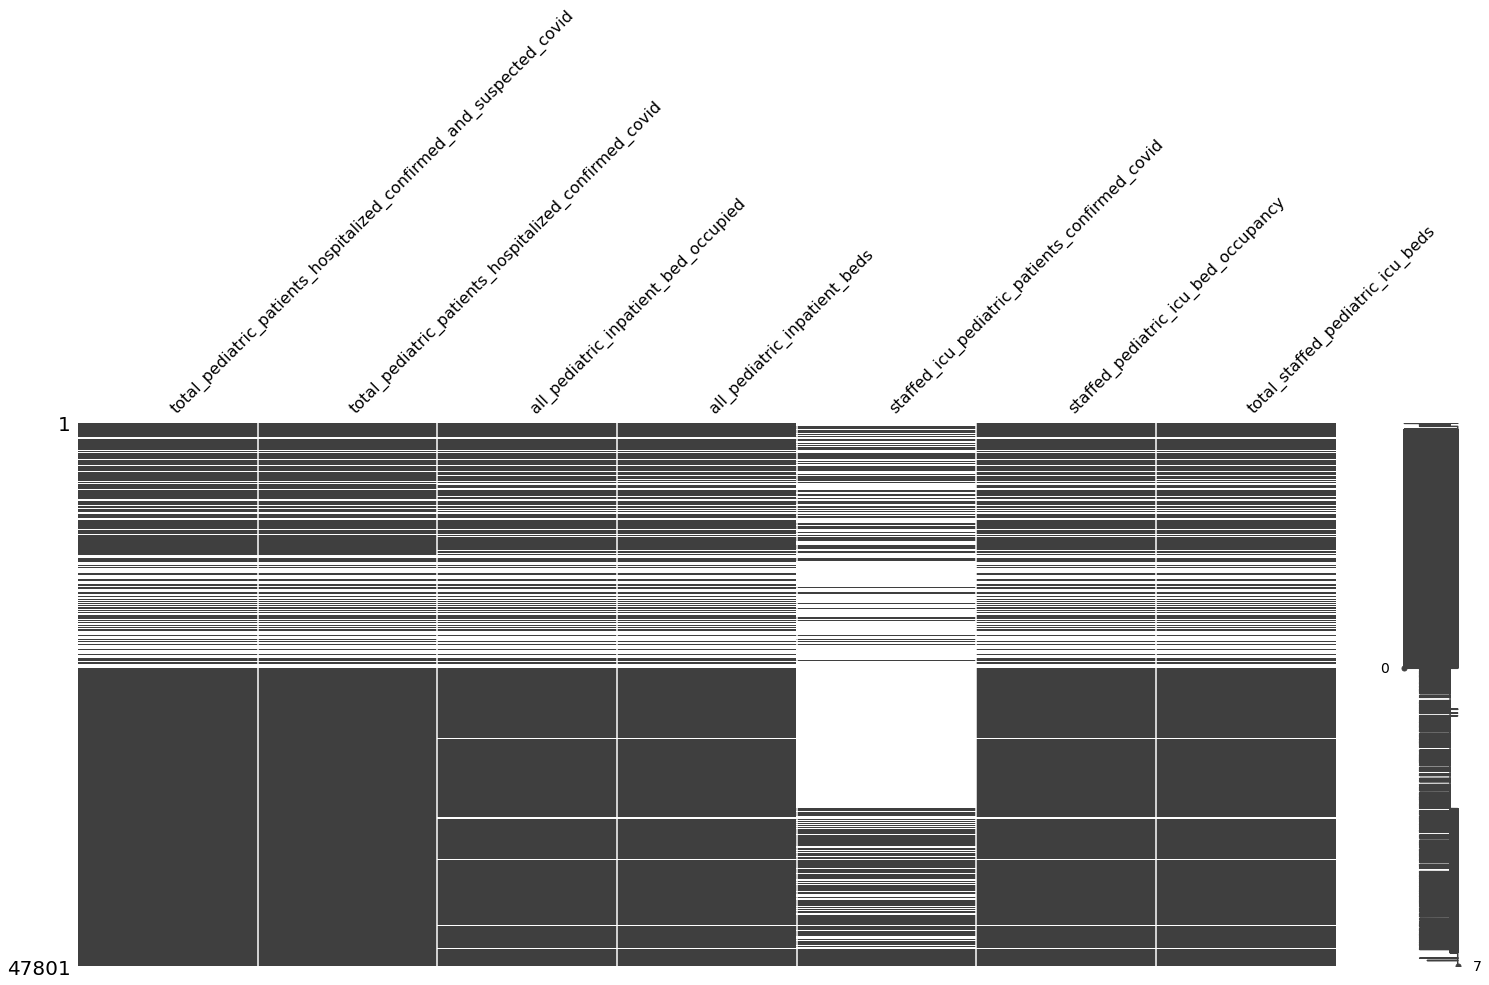

In [16]:
msno.matrix(pediatric)

In [18]:
#funcion creada en la libreria func_lib.py
missing_val(pediatric)[0]

total_pediatric_patients_hospitalized_confirmed_and_suspected_covid     7199
total_pediatric_patients_hospitalized_confirmed_covid                   7199
all_pediatric_inpatient_bed_occupied                                    8303
all_pediatric_inpatient_beds                                            8317
staffed_icu_pediatric_patients_confirmed_covid                         30149
staffed_pediatric_icu_bed_occupancy                                     8303
total_staffed_pediatric_icu_beds                                        8319
dtype: int64

La columna staffed_icu_pediatric_patients_confirmed_covid tiene alrededor del 63% de datos faltantes!
El resto de columnas tiene entre 15% y 18% de valores faltantes.

Se realizara un dropna a todo el df dado que se observa los datos faltantes estan altamente correlacionados (tambien se puede ver graficamente en la matriz)

<AxesSubplot:>

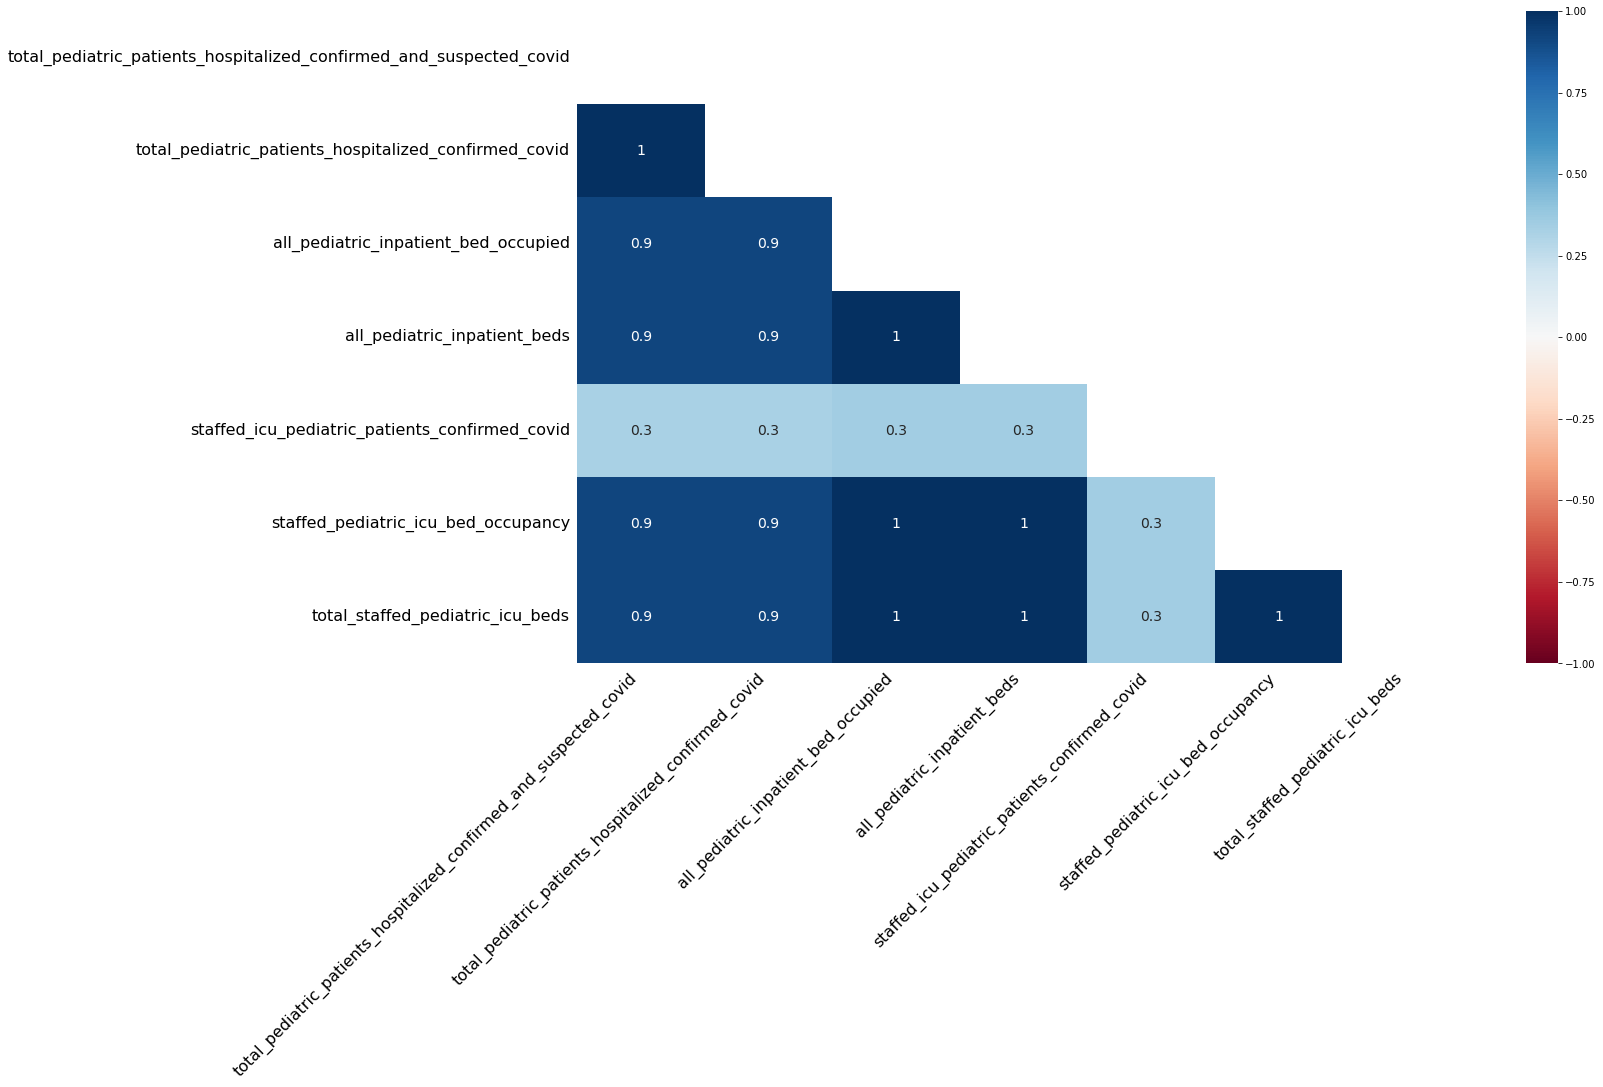

In [27]:
msno.heatmap(pediatric)

In [28]:
pediatric.dropna(inplace=True)
pediatric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17601 entries, 1 to 47800
Data columns (total 7 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   total_pediatric_patients_hospitalized_confirmed_and_suspected_covid  17601 non-null  float64
 1   total_pediatric_patients_hospitalized_confirmed_covid                17601 non-null  float64
 2   all_pediatric_inpatient_bed_occupied                                 17601 non-null  float64
 3   all_pediatric_inpatient_beds                                         17601 non-null  float64
 4   staffed_icu_pediatric_patients_confirmed_covid                       17601 non-null  float64
 5   staffed_pediatric_icu_bed_occupancy                                  17601 non-null  float64
 6   total_staffed_pediatric_icu_beds                                     17601 non-null  float64
dtypes: fl

Se utilizara en el analisis la columna "total_pediatric_patients_hospitalized_confirmed_covid" indice 36

<h3 id="Adultos">Adultos</h3>

Se realizaran los mismos pasos de analisis realizado para el anterior rango etario, pero se omitira algunos graficos y explicaciones. 


In [32]:
adult=pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv',thousands=',', usecols= lambda x: 'coverage' not in  x and 'previous' not in  x and 'ator' not in x and 'adult' in x) 
missing_val(adult)[0]

staffed_adult_icu_bed_occupancy                                    7196
staffed_icu_adult_patients_confirmed_and_suspected_covid           7116
staffed_icu_adult_patients_confirmed_covid                         6966
total_adult_patients_hospitalized_confirmed_and_suspected_covid    6611
total_adult_patients_hospitalized_confirmed_covid                  6521
total_staffed_adult_icu_beds                                       7003
adult_icu_bed_covid_utilization                                    7491
adult_icu_bed_utilization                                          7478
dtype: int64

<AxesSubplot:>

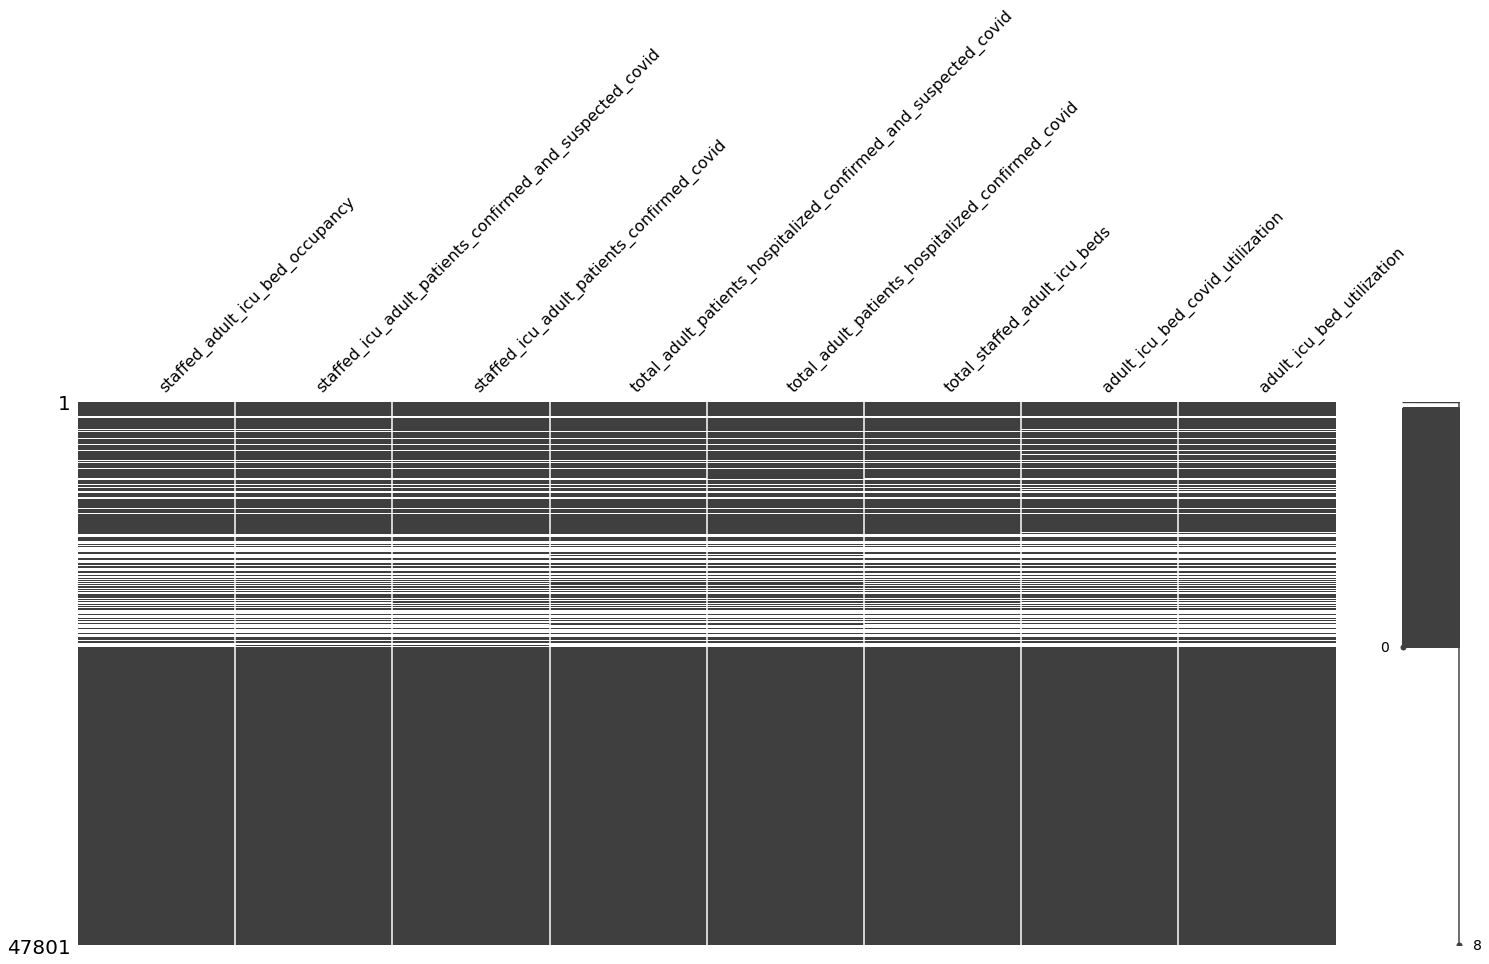

In [33]:
msno.matrix(adult)

In [36]:
adult.dropna(inplace=True)
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40303 entries, 0 to 47800
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   staffed_adult_icu_bed_occupancy                                  40303 non-null  float64
 1   staffed_icu_adult_patients_confirmed_and_suspected_covid         40303 non-null  float64
 2   staffed_icu_adult_patients_confirmed_covid                       40303 non-null  float64
 3   total_adult_patients_hospitalized_confirmed_and_suspected_covid  40303 non-null  float64
 4   total_adult_patients_hospitalized_confirmed_covid                40303 non-null  float64
 5   total_staffed_adult_icu_beds                                     40303 non-null  float64
 6   adult_icu_bed_covid_utilization                                  40303 non-null  float64
 7   adult_icu_bed_utilization                

Se utilizaran las columnas:
total_adult_patients_hospitalized_confirmed_covid, para poder realizar el analisis anologo con el rango pediatrico
y
staffed_icu_adult_patients_confirmed_covid y adult_icu_bed_covid_utilization para los otros analisis.

<h3 id="Personal medico">Personal medico</h3>

Estas columnas parecen estar bien reportadas, sin datos nulos!
Se usaran las columnas critical_staffing_shortage_today_yes y critical_staffing_shortage_today_no para realizar la comparacion con las muertes en el ultimo punto

In [41]:
medico=pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv',thousands=',', usecols= lambda x: 'critical' in x) 
medico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47801 entries, 0 to 47800
Data columns (total 6 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   critical_staffing_shortage_today_yes                             47801 non-null  int64
 1   critical_staffing_shortage_today_no                              47801 non-null  int64
 2   critical_staffing_shortage_today_not_reported                    47801 non-null  int64
 3   critical_staffing_shortage_anticipated_within_week_yes           47801 non-null  int64
 4   critical_staffing_shortage_anticipated_within_week_no            47801 non-null  int64
 5   critical_staffing_shortage_anticipated_within_week_not_reported  47801 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


<h2 id="Dataframe final">Dataframe final</h2>

In [4]:
df=pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv',thousands=',', usecols= [0,1,2,3,14,28,32,36,52,97], parse_dates=['date']) 
df.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds_used_covid,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization,deaths_covid
0,PR,2020-12-23,11,51,589.0,82.0,488.0,2.0,0.127007,59.0
1,OR,2020-12-22,5,55,606.0,95.0,497.0,4.0,0.159740,10.0
2,VI,2020-10-16,1,1,4.0,1.0,4.0,0.0,0.050000,0.0
3,VI,2020-10-15,1,1,4.0,1.0,4.0,0.0,0.050000,0.0
4,PR,2020-10-14,9,49,384.0,45.0,202.0,10.0,0.079687,6.0


In [49]:
m=missing_val(df)[0]
mp= [(i/47801)*100 for i in m]
mp

[0.17572854124390702,
 14.572916884584005,
 13.641974017279972,
 15.06035438589151,
 15.671220267358423,
 1.4330244137151944]

Vemos que el df total no tiene mas de un 15% de datos faltantes, y la mayoria se concentran en los reportes que diferencian rango etario de los primeros meses de la pandemia, probablemente por la rapidez y la falta de entrenamiento en esos primeros momentos.

Se aconseja sin embargo, realizar un seguimiento/control de:
-Por que no hay % de ocupacion calculado para Estados que cuentan con los datos?
-Por que el % difiere drasticamente del calculado? el delay en la informacion es este indicador es critico, no es solo un error del data entry. Se debe verificar que los hospitales/Estados esten teniendo este reporte al dia

In [5]:
df_notna=df.dropna()
df_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39879 entries, 0 to 47800
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   state                                                  39879 non-null  object        
 1   date                                                   39879 non-null  datetime64[ns]
 2   critical_staffing_shortage_today_yes                   39879 non-null  int64         
 3   critical_staffing_shortage_today_no                    39879 non-null  int64         
 4   inpatient_beds_used_covid                              39879 non-null  float64       
 5   staffed_icu_adult_patients_confirmed_covid             39879 non-null  float64       
 6   total_adult_patients_hospitalized_confirmed_covid      39879 non-null  float64       
 7   total_pediatric_patients_hospitalized_confirmed_covid  39879 non-nu

In [6]:
d_sort=df_notna.sort_values(by='date')
d_sort.describe()

,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds_used_covid,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization,deaths_covid
count,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000
mean,13.585647,75.572607,1121.903558,231.043707,966.229845,17.265528,0.149825,14.246496
std,19.138260,67.018544,1870.887988,406.919570,1716.391604,33.258193,0.120768,31.486967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,181.500000,29.000000,141.000000,2.000000,0.055036,1.000000
50%,8.000000,63.000000,504.000000,93.000000,403.000000,7.000000,0.112069,4.000000
75%,19.000000,101.000000,1260.000000,263.000000,1036.000000,19.000000,0.220603,15.000000
max,191.000000,495.000000,30334.000000,4926.000000,29553.000000,499.000000,1.188826,567.000000


In [7]:
#Estado y por anho
group_state_sum=d_sort.groupby([d_sort.date.dt.year, d_sort.state]).sum().reset_index()
group_state_sum

,date,state,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds_used_covid,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization,deaths_covid
0,2020,AK,423,2699,13350.0,2507.0,10609.0,351.0,22.191117,171.0
1,2020,AL,5245,12040,257490.0,67828.0,224254.0,2879.0,48.253115,3069.0
2,2020,AR,5576,9985,160761.0,42993.0,104849.0,1698.0,47.264354,2363.0
3,2020,AZ,4645,10775,307948.0,66852.0,238371.0,5710.0,41.882382,4833.0
4,2020,CA,14095,46460,1223208.0,260865.0,1029616.0,9909.0,38.427293,16537.0
...,...,...,...,...,...,...,...,...,...,...
156,2022,VT,1762,1756,10754.0,1841.0,10557.0,287.0,20.132581,64.0
157,2022,WA,1061,18891,218942.0,25283.0,175437.0,4458.0,24.912681,2175.0
158,2022,WI,4960,22650,159189.0,28387.0,150599.0,1843.0,22.333575,580.0
159,2022,WV,692,2510,96891.0,17091.0,91112.0,1770.0,27.614674,258.0


In [8]:
#finalmente, agrugados por anho y Estado
y2020=group_state_sum[group_state_sum.date==2020].drop(columns=['date'])
y2020.head()

,state,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds_used_covid,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization,deaths_covid
0,AK,423,2699,13350.0,2507.0,10609.0,351.0,22.191117,171.0
1,AL,5245,12040,257490.0,67828.0,224254.0,2879.0,48.253115,3069.0
2,AR,5576,9985,160761.0,42993.0,104849.0,1698.0,47.264354,2363.0
3,AZ,4645,10775,307948.0,66852.0,238371.0,5710.0,41.882382,4833.0
4,CA,14095,46460,1223208.0,260865.0,1029616.0,9909.0,38.427293,16537.0


In [40]:
#para hacer el acumulado diario sumo las columnas staffed_icu_adult_patients_confirmed_covid, total_adult_patients_hospitalized_confirmed_covid, total_pediatric_patients_hospitalized_confirmed_covid
daily=d_sort[['date','staffed_icu_adult_patients_confirmed_covid','total_adult_patients_hospitalized_confirmed_covid','total_pediatric_patients_hospitalized_confirmed_covid']].set_index('date')
daily['acumulado'] = daily.sum(axis=1)
daily

,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,acumulado
date,,,,
2020-01-02,397.0,1792.0,9.0,2198.0
2020-01-03,397.0,1792.0,9.0,2198.0
2020-01-04,397.0,1792.0,9.0,2198.0
2020-01-05,397.0,1792.0,9.0,2198.0
2020-01-06,397.0,1792.0,9.0,2198.0
...,...,...,...,...
2022-08-08,33.0,316.0,7.0,356.0
2022-08-08,93.0,605.0,7.0,705.0
2022-08-08,91.0,541.0,20.0,652.0


In [42]:
cum=daily.cumsum()
cum

,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,acumulado
date,,,,
2020-01-02,397.0,1792.0,9.0,2198.0
2020-01-03,794.0,3584.0,18.0,4396.0
2020-01-04,1191.0,5376.0,27.0,6594.0
2020-01-05,1588.0,7168.0,36.0,8792.0
2020-01-06,1985.0,8960.0,45.0,10990.0
...,...,...,...,...
2022-08-08,9213451.0,38529706.0,688470.0,48431627.0
2022-08-08,9213544.0,38530311.0,688477.0,48432332.0
2022-08-08,9213635.0,38530852.0,688497.0,48432984.0


RESPUESTAS QUE NO PUEDEN SER RESPONDIDAS CON DASHBOARD EN EL FORMULARIO

In [ ]:
#4-¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020?
y2020.sort_values(by='adult_icu_bed_covid_utilization', ascending=False).head(5)